In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [1]:
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from google.colab import drive
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


# 导入数据集

In [3]:
def load_data():
    (x_train,y_train),(_,_) = mnist.load_data()
    x_train = (x_train.astype(np.float32)-127.5)/127.5
    x_train = x_train.reshape(60000,784)
    return (x_train,y_train)

X_train,y_train = load_data()
print(X_train.shape,y_train.shape)

(60000, 784) (60000,)


In [4]:
(x,y),(_,_) = mnist.load_data()
for i in range(1,10):
    image = Image.fromarray(x[i])
    display(image)
# image = Image.fromarray(x[0])
# display(image)

# 生成器G

In [5]:
def build_generator():
    modelG = Sequential()

    modelG.add(Dense(units=256,input_dim=100))
    modelG.add(LeakyReLU(alpha=0.2))

    modelG.add(Dense(units=512))
    modelG.add(LeakyReLU(alpha=0.2))

    modelG.add(Dense(units=1024))
    modelG.add(LeakyReLU(alpha=0.2))

    modelG.add(Dense(units=784,activation="tanh"))
    modelG.compile(loss='binary_crossentropy',
                 optimizer=Adam(0.0002,0.5))
    return modelG

generator = build_generator()
generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)              

# 分类器D

In [6]:
 def build_discriminator():
    modelD = Sequential()

    modelD.add(Dense(units=1024,input_dim=784))
    modelD.add(LeakyReLU(alpha=0.2))
    modelD.add(Dropout(0.3))

    modelD.add(Dense(units=512))
    modelD.add(LeakyReLU(alpha=0.2))
    modelD.add(Dropout(0.3))

    modelD.add(Dense(units=256))
    modelD.add(LeakyReLU(alpha=0.2))
    modelD.add(Dropout(0.3))

    modelD.add(Dense(units=1,activation='sigmoid'))

    modelD.compile(loss='binary_crossentropy',
                  optimizer=Adam(0.0002,0.5))
    return modelD

discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)              

# 建立GAN网络

In [7]:
def build_GAN(modelD,modelG):
    modelD.trainable = False
    GAN_input = Input(shape=(100,))
    x = modelG(GAN_input)
    GAN_output = modelD(x)
    GAN = Model(inputs=GAN_input,outputs=GAN_output)
    GAN.compile(loss='binary_crossentropy',optimizer=Adam(0.0002,0.5))
    return GAN

GAN = build_GAN(discriminator,generator)
GAN.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


# 绘图

In [8]:
def draw_images(generator, epoch, examples=25, dim=(5,5), figsize=(10,10)):
    noise = np.random.normal(loc=0,scale=1,size=[examples,100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0],dim[1],i+1)
        plt.imshow(generated_images[i],interpolation='nearest',cmap='Greys')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('outputMnist/Generated_images %d.png' %epoch)

# 训练

Epoch 1


100%|██████████| 128/128 [00:04<00:00, 27.81it/s]


Epoch 2


100%|██████████| 128/128 [00:02<00:00, 50.06it/s]


Epoch 3


100%|██████████| 128/128 [00:02<00:00, 50.75it/s]


Epoch 4


100%|██████████| 128/128 [00:02<00:00, 51.13it/s]


Epoch 5


100%|██████████| 128/128 [00:02<00:00, 50.35it/s]


Epoch 6


100%|██████████| 128/128 [00:02<00:00, 48.38it/s]


Epoch 7


100%|██████████| 128/128 [00:02<00:00, 50.85it/s]


Epoch 8


100%|██████████| 128/128 [00:02<00:00, 51.01it/s]


Epoch 9


100%|██████████| 128/128 [00:02<00:00, 49.68it/s]


Epoch 10


100%|██████████| 128/128 [00:01<00:00, 70.74it/s]


Epoch 11


100%|██████████| 128/128 [00:02<00:00, 55.12it/s]


Epoch 12


100%|██████████| 128/128 [00:02<00:00, 50.68it/s]


Epoch 13


100%|██████████| 128/128 [00:02<00:00, 50.87it/s]


Epoch 14


100%|██████████| 128/128 [00:02<00:00, 49.67it/s]


Epoch 15


100%|██████████| 128/128 [00:02<00:00, 49.60it/s]


Epoch 16


100%|██████████| 128/128 [00:02<00:00, 49.98it/s]


Epoch 17


100%|██████████| 128/128 [00:02<00:00, 51.58it/s]


Epoch 18


100%|██████████| 128/128 [00:02<00:00, 48.48it/s]


Epoch 19


100%|██████████| 128/128 [00:02<00:00, 48.47it/s]


Epoch 20


100%|██████████| 128/128 [00:02<00:00, 49.67it/s]


Epoch 21


100%|██████████| 128/128 [00:02<00:00, 49.67it/s]


Epoch 22


100%|██████████| 128/128 [00:02<00:00, 50.30it/s]


Epoch 23


100%|██████████| 128/128 [00:02<00:00, 49.41it/s]


Epoch 24


100%|██████████| 128/128 [00:02<00:00, 52.46it/s]


Epoch 25


100%|██████████| 128/128 [00:02<00:00, 52.83it/s]


Epoch 26


100%|██████████| 128/128 [00:02<00:00, 50.15it/s]


Epoch 27


100%|██████████| 128/128 [00:02<00:00, 54.43it/s]


Epoch 28


100%|██████████| 128/128 [00:02<00:00, 48.72it/s]


Epoch 29


100%|██████████| 128/128 [00:02<00:00, 49.57it/s]


Epoch 30


100%|██████████| 128/128 [00:02<00:00, 50.74it/s]


Epoch 31


100%|██████████| 128/128 [00:02<00:00, 50.31it/s]


Epoch 32


100%|██████████| 128/128 [00:02<00:00, 53.11it/s]


Epoch 33


100%|██████████| 128/128 [00:02<00:00, 52.76it/s]


Epoch 34


100%|██████████| 128/128 [00:02<00:00, 53.08it/s]


Epoch 35


100%|██████████| 128/128 [00:02<00:00, 51.86it/s]


Epoch 36


100%|██████████| 128/128 [00:02<00:00, 51.94it/s]


Epoch 37


100%|██████████| 128/128 [00:02<00:00, 52.10it/s]


Epoch 38


100%|██████████| 128/128 [00:02<00:00, 52.50it/s]


Epoch 39


100%|██████████| 128/128 [00:02<00:00, 53.17it/s]


Epoch 40


100%|██████████| 128/128 [00:02<00:00, 51.58it/s]


Epoch 41


100%|██████████| 128/128 [00:02<00:00, 52.70it/s]


Epoch 42


100%|██████████| 128/128 [00:02<00:00, 51.09it/s]


Epoch 43


100%|██████████| 128/128 [00:02<00:00, 53.01it/s]


Epoch 44


100%|██████████| 128/128 [00:02<00:00, 51.17it/s]


Epoch 45


100%|██████████| 128/128 [00:02<00:00, 52.46it/s]


Epoch 46


100%|██████████| 128/128 [00:02<00:00, 51.93it/s]


Epoch 47


100%|██████████| 128/128 [00:02<00:00, 52.89it/s]


Epoch 48


100%|██████████| 128/128 [00:02<00:00, 52.06it/s]


Epoch 49


100%|██████████| 128/128 [00:02<00:00, 51.18it/s]


Epoch 50


100%|██████████| 128/128 [00:02<00:00, 51.69it/s]


Epoch 51


100%|██████████| 128/128 [00:02<00:00, 51.75it/s]


Epoch 52


100%|██████████| 128/128 [00:02<00:00, 52.84it/s]


Epoch 53


100%|██████████| 128/128 [00:02<00:00, 52.37it/s]


Epoch 54


100%|██████████| 128/128 [00:02<00:00, 52.04it/s]


Epoch 55


100%|██████████| 128/128 [00:02<00:00, 51.75it/s]


Epoch 56


100%|██████████| 128/128 [00:02<00:00, 52.32it/s]


Epoch 57


100%|██████████| 128/128 [00:02<00:00, 54.37it/s]


Epoch 58


100%|██████████| 128/128 [00:02<00:00, 54.64it/s]


Epoch 59


100%|██████████| 128/128 [00:02<00:00, 52.38it/s]


Epoch 60


100%|██████████| 128/128 [00:02<00:00, 48.57it/s]


Epoch 61


100%|██████████| 128/128 [00:02<00:00, 49.31it/s]


Epoch 62


100%|██████████| 128/128 [00:02<00:00, 51.32it/s]


Epoch 63


100%|██████████| 128/128 [00:02<00:00, 50.67it/s]


Epoch 64


100%|██████████| 128/128 [00:02<00:00, 51.03it/s]


Epoch 65


100%|██████████| 128/128 [00:02<00:00, 49.25it/s]


Epoch 66


100%|██████████| 128/128 [00:02<00:00, 51.76it/s]


Epoch 67


100%|██████████| 128/128 [00:02<00:00, 50.63it/s]


Epoch 68


100%|██████████| 128/128 [00:02<00:00, 49.78it/s]


Epoch 69


100%|██████████| 128/128 [00:02<00:00, 49.18it/s]


Epoch 70


100%|██████████| 128/128 [00:02<00:00, 51.76it/s]


Epoch 71


100%|██████████| 128/128 [00:02<00:00, 51.20it/s]


Epoch 72


100%|██████████| 128/128 [00:02<00:00, 49.37it/s]


Epoch 73


100%|██████████| 128/128 [00:02<00:00, 50.67it/s]


Epoch 74


100%|██████████| 128/128 [00:02<00:00, 50.40it/s]


Epoch 75


100%|██████████| 128/128 [00:02<00:00, 49.84it/s]


Epoch 76


100%|██████████| 128/128 [00:02<00:00, 51.81it/s]


Epoch 77


100%|██████████| 128/128 [00:02<00:00, 48.02it/s]


Epoch 78


100%|██████████| 128/128 [00:02<00:00, 50.56it/s]


Epoch 79


100%|██████████| 128/128 [00:02<00:00, 49.83it/s]


Epoch 80


100%|██████████| 128/128 [00:02<00:00, 49.50it/s]


Epoch 81


100%|██████████| 128/128 [00:02<00:00, 50.22it/s]


Epoch 82


100%|██████████| 128/128 [00:02<00:00, 50.42it/s]


Epoch 83


100%|██████████| 128/128 [00:02<00:00, 49.53it/s]


Epoch 84


100%|██████████| 128/128 [00:02<00:00, 49.54it/s]


Epoch 85


100%|██████████| 128/128 [00:02<00:00, 51.16it/s]


Epoch 86


100%|██████████| 128/128 [00:02<00:00, 49.25it/s]


Epoch 87


100%|██████████| 128/128 [00:02<00:00, 50.02it/s]


Epoch 88


100%|██████████| 128/128 [00:02<00:00, 50.74it/s]


Epoch 89


100%|██████████| 128/128 [00:02<00:00, 49.21it/s]


Epoch 90


100%|██████████| 128/128 [00:02<00:00, 50.71it/s]


Epoch 91


100%|██████████| 128/128 [00:02<00:00, 51.28it/s]


Epoch 92


100%|██████████| 128/128 [00:02<00:00, 49.84it/s]


Epoch 93


100%|██████████| 128/128 [00:02<00:00, 50.51it/s]


Epoch 94


100%|██████████| 128/128 [00:02<00:00, 49.75it/s]


Epoch 95


100%|██████████| 128/128 [00:02<00:00, 50.02it/s]


Epoch 96


100%|██████████| 128/128 [00:02<00:00, 50.07it/s]


Epoch 97


100%|██████████| 128/128 [00:02<00:00, 52.39it/s]


Epoch 98


100%|██████████| 128/128 [00:02<00:00, 50.47it/s]


Epoch 99


100%|██████████| 128/128 [00:02<00:00, 50.90it/s]


Epoch 100


100%|██████████| 128/128 [00:02<00:00, 48.88it/s]


Epoch 101


100%|██████████| 128/128 [00:02<00:00, 49.77it/s]


Epoch 102


100%|██████████| 128/128 [00:02<00:00, 50.95it/s]


Epoch 103


100%|██████████| 128/128 [00:02<00:00, 48.70it/s]


Epoch 104


100%|██████████| 128/128 [00:02<00:00, 50.05it/s]


Epoch 105


100%|██████████| 128/128 [00:02<00:00, 49.97it/s]


Epoch 106


100%|██████████| 128/128 [00:02<00:00, 50.49it/s]


Epoch 107


100%|██████████| 128/128 [00:02<00:00, 50.02it/s]


Epoch 108


100%|██████████| 128/128 [00:02<00:00, 51.50it/s]


Epoch 109


100%|██████████| 128/128 [00:02<00:00, 49.36it/s]


Epoch 110


100%|██████████| 128/128 [00:02<00:00, 50.56it/s]


Epoch 111


100%|██████████| 128/128 [00:02<00:00, 51.74it/s]


Epoch 112


100%|██████████| 128/128 [00:02<00:00, 50.19it/s]


Epoch 113


100%|██████████| 128/128 [00:02<00:00, 49.64it/s]


Epoch 114


100%|██████████| 128/128 [00:02<00:00, 51.59it/s]


Epoch 115


100%|██████████| 128/128 [00:02<00:00, 49.61it/s]


Epoch 116


100%|██████████| 128/128 [00:02<00:00, 51.34it/s]


Epoch 117


100%|██████████| 128/128 [00:02<00:00, 49.05it/s]


Epoch 118


100%|██████████| 128/128 [00:02<00:00, 49.43it/s]


Epoch 119


100%|██████████| 128/128 [00:02<00:00, 50.49it/s]


Epoch 120


100%|██████████| 128/128 [00:02<00:00, 50.48it/s]


Epoch 121


100%|██████████| 128/128 [00:02<00:00, 50.75it/s]


Epoch 122


100%|██████████| 128/128 [00:02<00:00, 51.21it/s]


Epoch 123


100%|██████████| 128/128 [00:02<00:00, 51.57it/s]


Epoch 124


100%|██████████| 128/128 [00:02<00:00, 49.61it/s]


Epoch 125


100%|██████████| 128/128 [00:02<00:00, 49.49it/s]


Epoch 126


100%|██████████| 128/128 [00:02<00:00, 48.76it/s]


Epoch 127


100%|██████████| 128/128 [00:02<00:00, 51.01it/s]


Epoch 128


100%|██████████| 128/128 [00:02<00:00, 49.66it/s]


Epoch 129


100%|██████████| 128/128 [00:02<00:00, 50.40it/s]


Epoch 130


100%|██████████| 128/128 [00:02<00:00, 49.54it/s]


Epoch 131


100%|██████████| 128/128 [00:02<00:00, 51.92it/s]


Epoch 132


100%|██████████| 128/128 [00:02<00:00, 50.47it/s]


Epoch 133


100%|██████████| 128/128 [00:02<00:00, 52.21it/s]


Epoch 134


100%|██████████| 128/128 [00:02<00:00, 50.47it/s]


Epoch 135


100%|██████████| 128/128 [00:02<00:00, 49.41it/s]


Epoch 136


100%|██████████| 128/128 [00:02<00:00, 49.64it/s]


Epoch 137


100%|██████████| 128/128 [00:02<00:00, 50.05it/s]


Epoch 138


100%|██████████| 128/128 [00:02<00:00, 50.18it/s]


Epoch 139


100%|██████████| 128/128 [00:02<00:00, 50.18it/s]


Epoch 140


100%|██████████| 128/128 [00:02<00:00, 50.44it/s]


Epoch 141


100%|██████████| 128/128 [00:02<00:00, 51.19it/s]


Epoch 142


100%|██████████| 128/128 [00:02<00:00, 51.76it/s]


Epoch 143


100%|██████████| 128/128 [00:02<00:00, 50.05it/s]


Epoch 144


100%|██████████| 128/128 [00:02<00:00, 49.62it/s]


Epoch 145


100%|██████████| 128/128 [00:02<00:00, 51.36it/s]


Epoch 146


100%|██████████| 128/128 [00:02<00:00, 50.87it/s]


Epoch 147


100%|██████████| 128/128 [00:02<00:00, 44.44it/s]


Epoch 148


100%|██████████| 128/128 [00:02<00:00, 50.60it/s]


Epoch 149


100%|██████████| 128/128 [00:02<00:00, 49.96it/s]


Epoch 150


100%|██████████| 128/128 [00:02<00:00, 52.19it/s]


Epoch 151


100%|██████████| 128/128 [00:02<00:00, 53.95it/s]


Epoch 152


100%|██████████| 128/128 [00:02<00:00, 49.89it/s]


Epoch 153


100%|██████████| 128/128 [00:02<00:00, 49.16it/s]


Epoch 154


100%|██████████| 128/128 [00:02<00:00, 52.50it/s]


Epoch 155


100%|██████████| 128/128 [00:02<00:00, 52.31it/s]


Epoch 156


100%|██████████| 128/128 [00:02<00:00, 51.20it/s]


Epoch 157


100%|██████████| 128/128 [00:02<00:00, 50.77it/s]


Epoch 158


100%|██████████| 128/128 [00:02<00:00, 51.50it/s]


Epoch 159


100%|██████████| 128/128 [00:02<00:00, 52.45it/s]


Epoch 160


100%|██████████| 128/128 [00:02<00:00, 50.84it/s]


Epoch 161


100%|██████████| 128/128 [00:02<00:00, 51.43it/s]


Epoch 162


100%|██████████| 128/128 [00:02<00:00, 51.95it/s]


Epoch 163


100%|██████████| 128/128 [00:02<00:00, 49.71it/s]


Epoch 164


100%|██████████| 128/128 [00:02<00:00, 50.12it/s]


Epoch 165


100%|██████████| 128/128 [00:02<00:00, 51.76it/s]


Epoch 166


100%|██████████| 128/128 [00:02<00:00, 50.87it/s]


Epoch 167


100%|██████████| 128/128 [00:02<00:00, 49.78it/s]


Epoch 168


100%|██████████| 128/128 [00:02<00:00, 49.88it/s]


Epoch 169


100%|██████████| 128/128 [00:02<00:00, 50.17it/s]


Epoch 170


100%|██████████| 128/128 [00:02<00:00, 50.42it/s]


Epoch 171


100%|██████████| 128/128 [00:02<00:00, 51.87it/s]


Epoch 172


100%|██████████| 128/128 [00:02<00:00, 51.00it/s]


Epoch 173


100%|██████████| 128/128 [00:02<00:00, 52.44it/s]


Epoch 174


100%|██████████| 128/128 [00:02<00:00, 51.56it/s]


Epoch 175


100%|██████████| 128/128 [00:02<00:00, 51.06it/s]


Epoch 176


100%|██████████| 128/128 [00:02<00:00, 50.39it/s]


Epoch 177


100%|██████████| 128/128 [00:02<00:00, 51.82it/s]


Epoch 178


100%|██████████| 128/128 [00:02<00:00, 50.58it/s]


Epoch 179


100%|██████████| 128/128 [00:02<00:00, 50.76it/s]


Epoch 180


100%|██████████| 128/128 [00:02<00:00, 50.71it/s]


Epoch 181


100%|██████████| 128/128 [00:02<00:00, 54.89it/s]


Epoch 182


100%|██████████| 128/128 [00:02<00:00, 53.66it/s]


Epoch 183


100%|██████████| 128/128 [00:02<00:00, 51.31it/s]


Epoch 184


100%|██████████| 128/128 [00:02<00:00, 52.09it/s]


Epoch 185


100%|██████████| 128/128 [00:02<00:00, 53.07it/s]


Epoch 186


100%|██████████| 128/128 [00:02<00:00, 52.10it/s]


Epoch 187


100%|██████████| 128/128 [00:02<00:00, 51.61it/s]


Epoch 188


100%|██████████| 128/128 [00:02<00:00, 51.22it/s]


Epoch 189


100%|██████████| 128/128 [00:02<00:00, 55.31it/s]


Epoch 190


100%|██████████| 128/128 [00:02<00:00, 54.16it/s]


Epoch 191


100%|██████████| 128/128 [00:02<00:00, 53.77it/s]


Epoch 192


100%|██████████| 128/128 [00:02<00:00, 55.00it/s]


Epoch 193


100%|██████████| 128/128 [00:02<00:00, 54.82it/s]


Epoch 194


100%|██████████| 128/128 [00:02<00:00, 50.67it/s]


Epoch 195


100%|██████████| 128/128 [00:02<00:00, 49.95it/s]


Epoch 196


100%|██████████| 128/128 [00:02<00:00, 51.80it/s]


Epoch 197


100%|██████████| 128/128 [00:02<00:00, 52.15it/s]


Epoch 198


100%|██████████| 128/128 [00:02<00:00, 50.66it/s]


Epoch 199


100%|██████████| 128/128 [00:02<00:00, 51.04it/s]


Epoch 200


100%|██████████| 128/128 [00:02<00:00, 51.14it/s]
/home/zouzh/anaconda3/envs/tensorflow-GPU/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


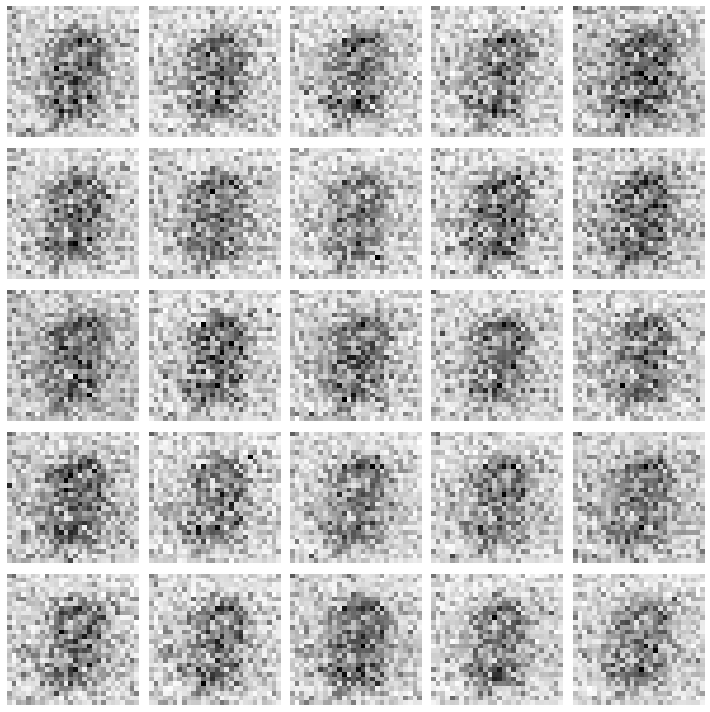

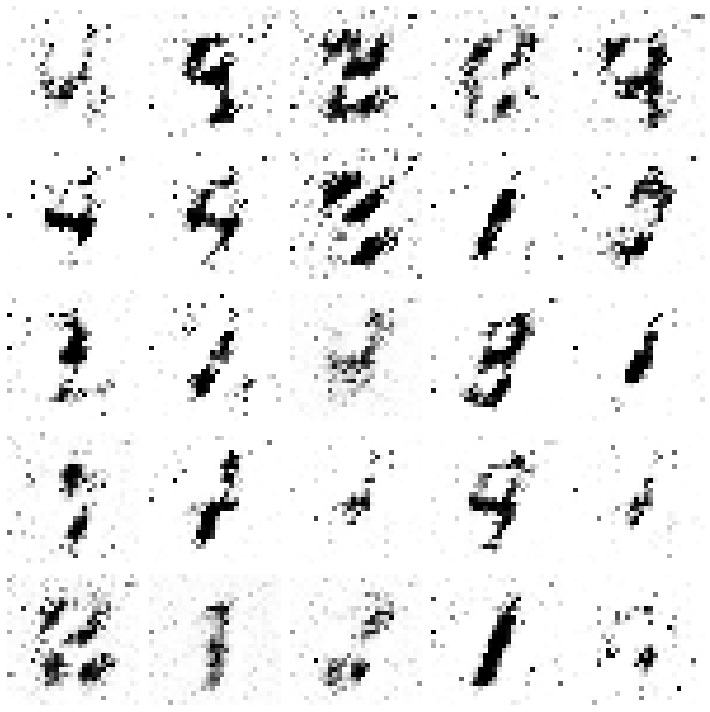

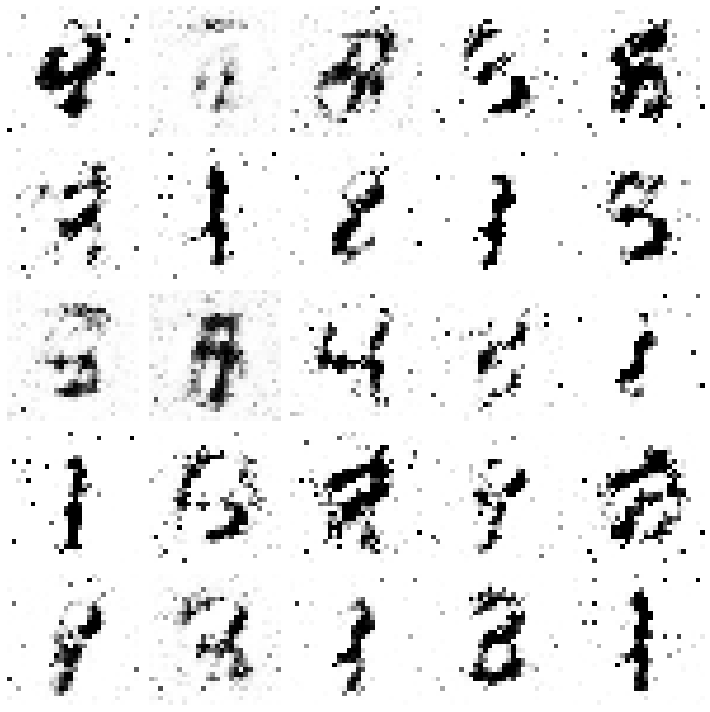

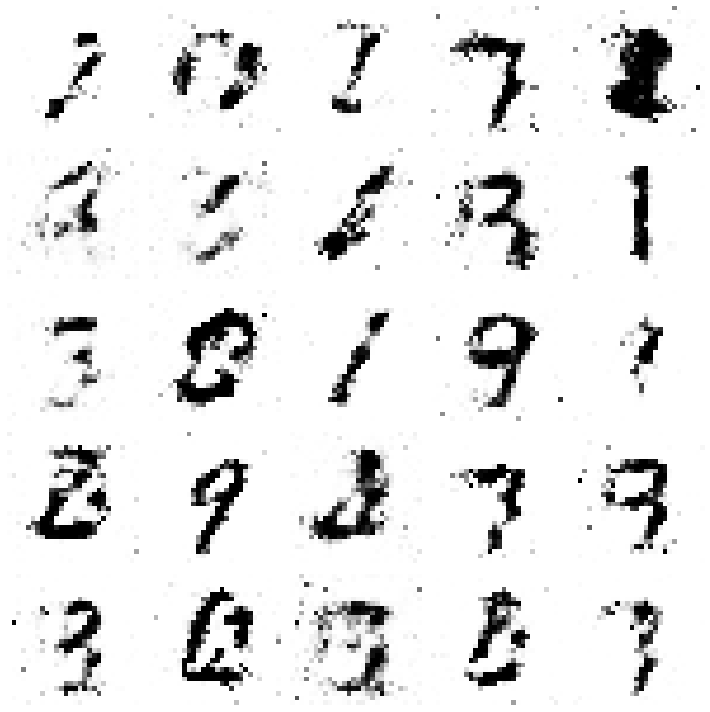

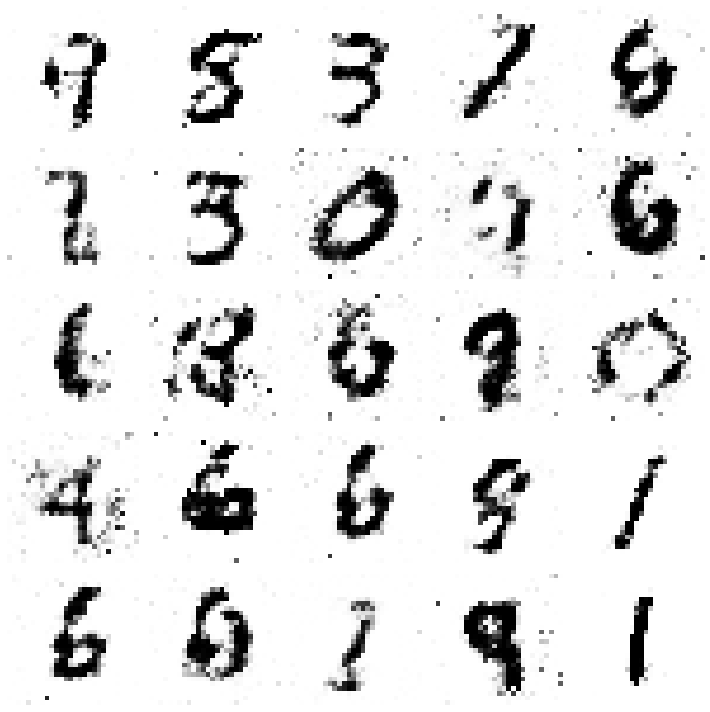

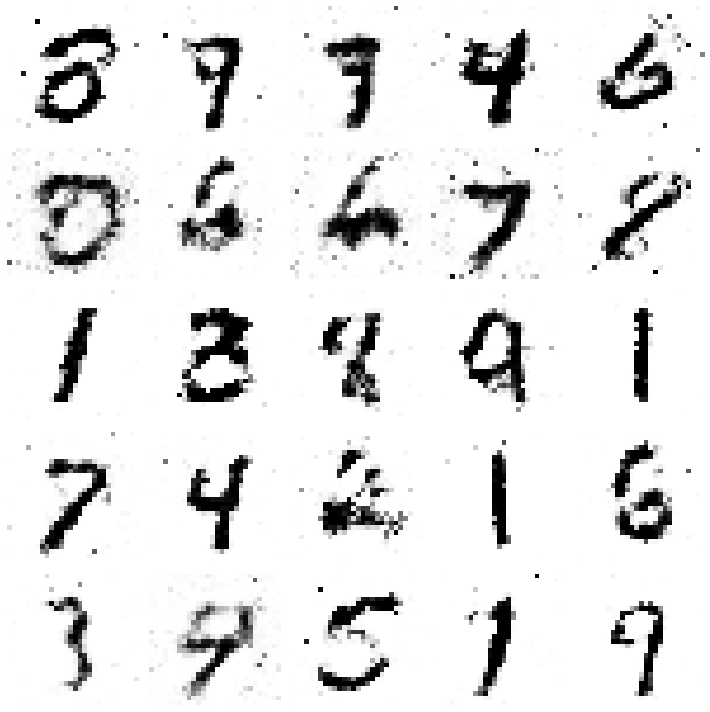

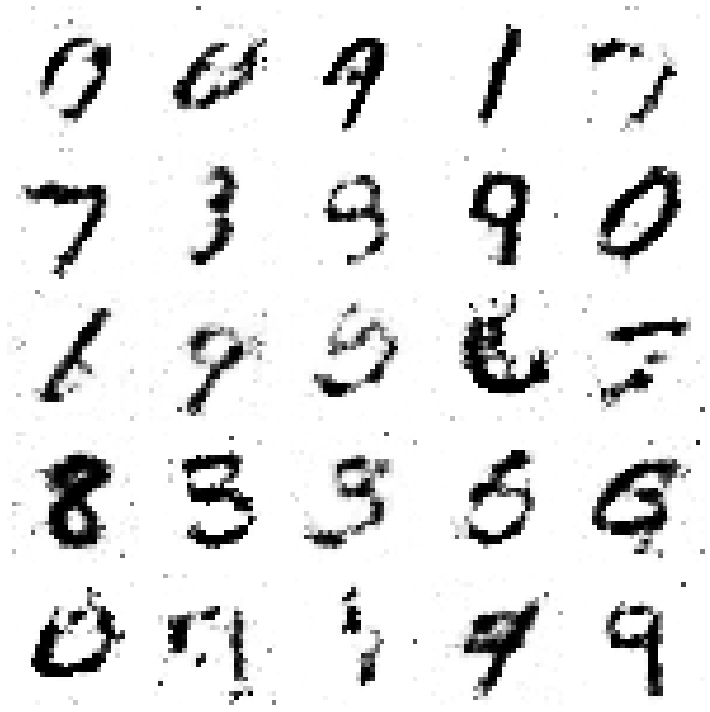

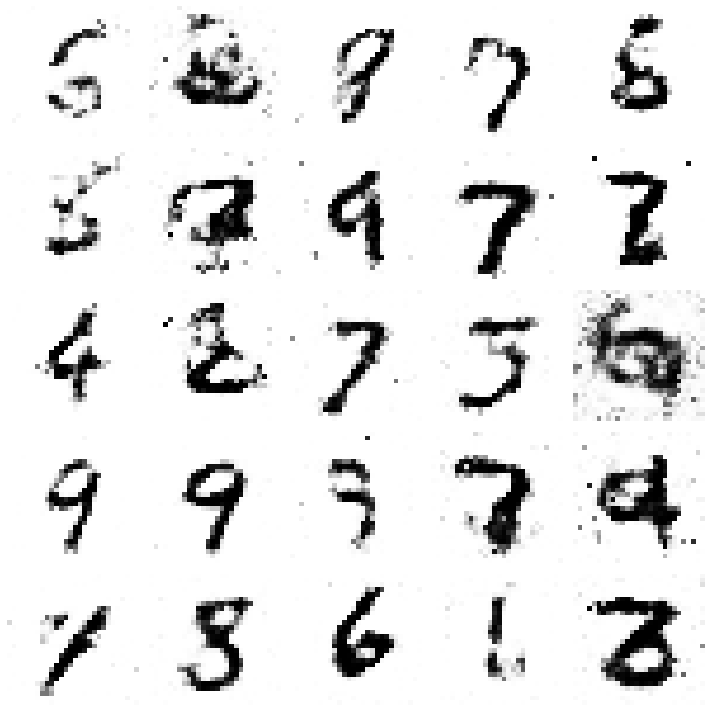

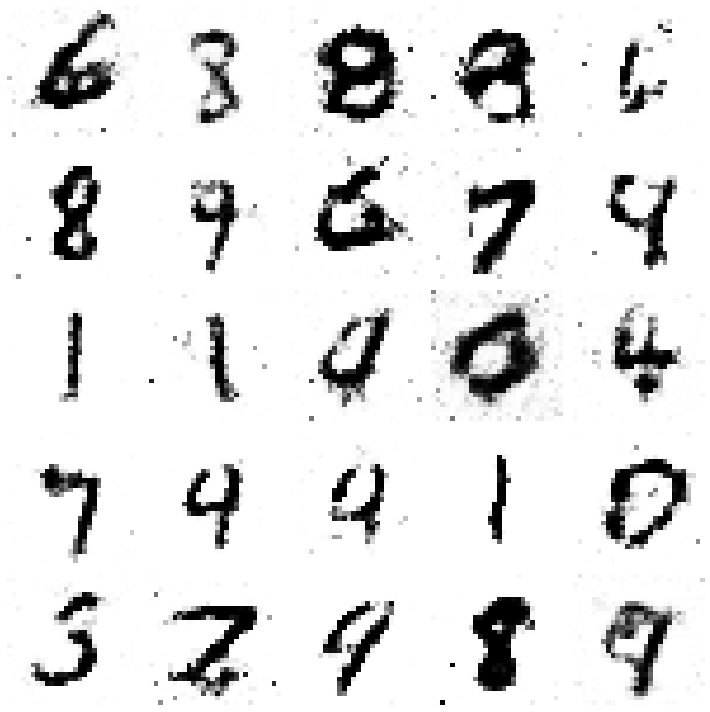

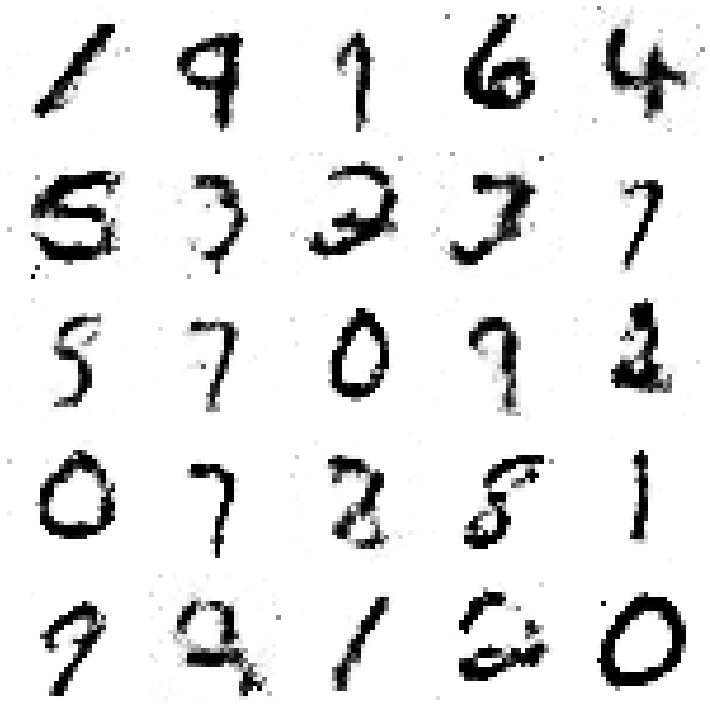

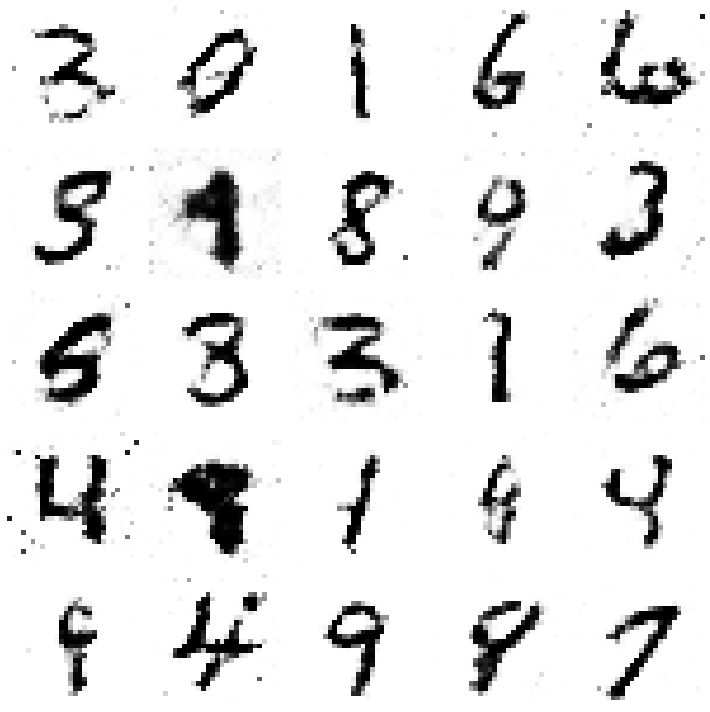

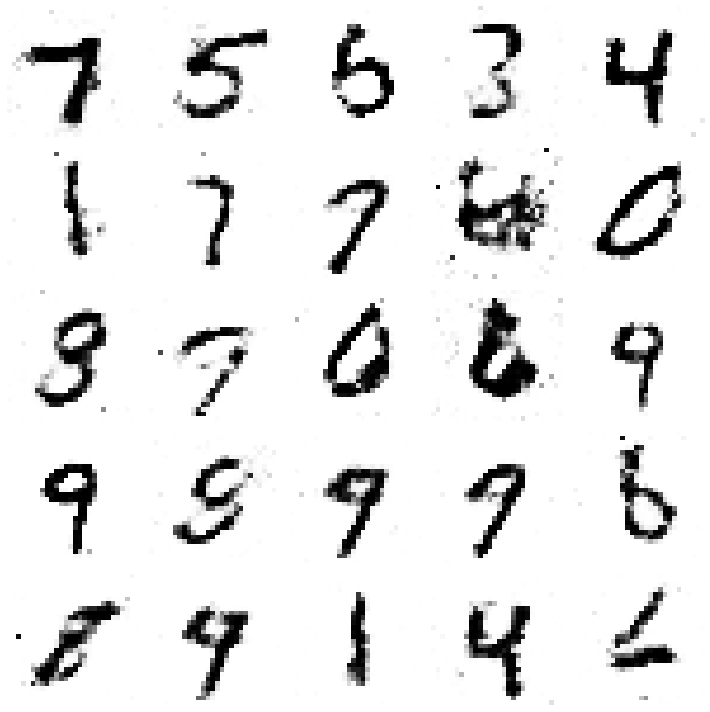

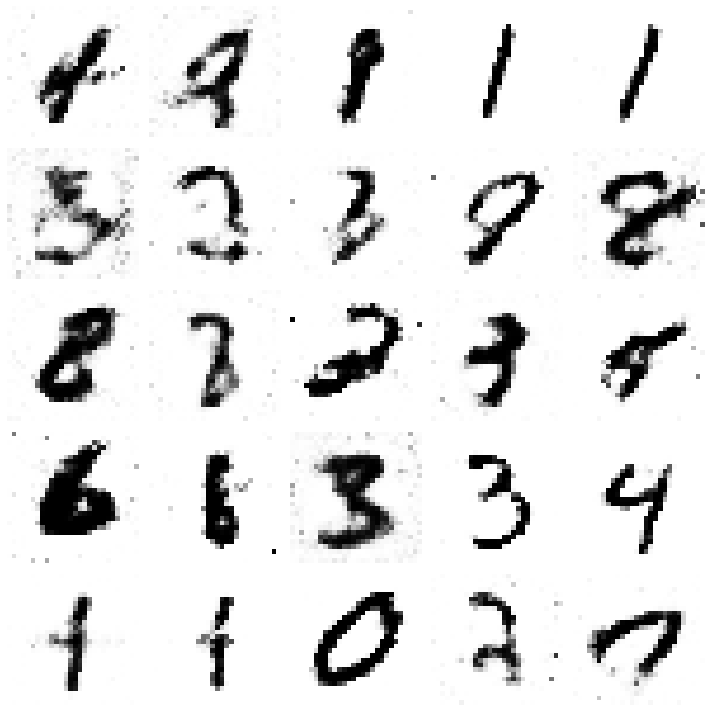

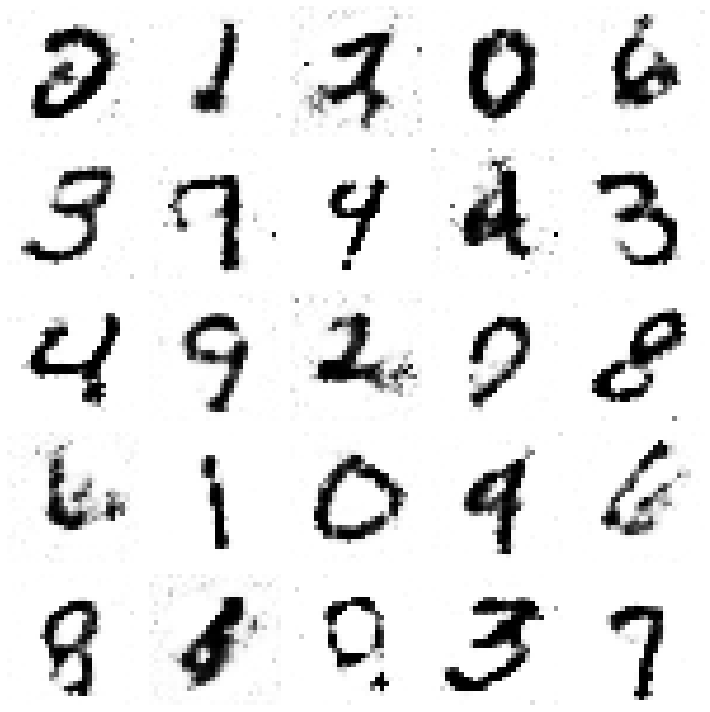

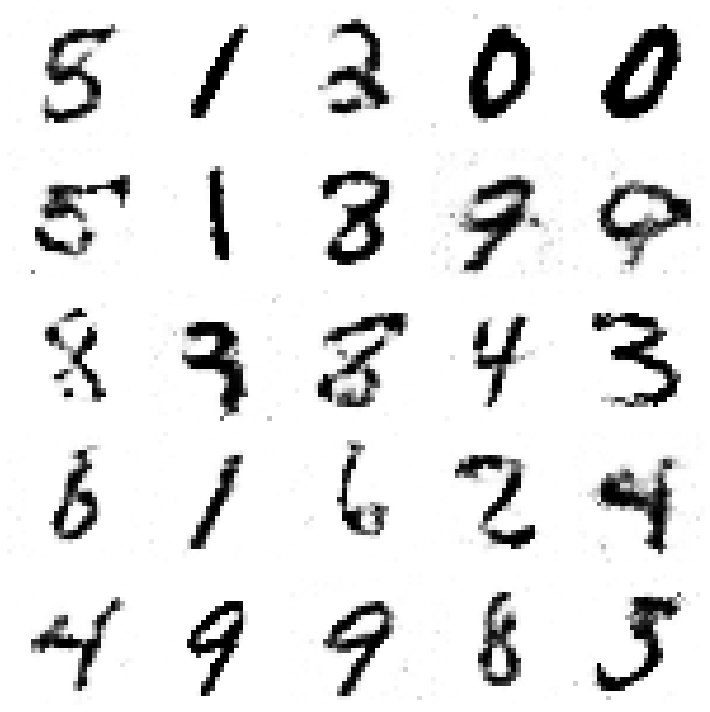

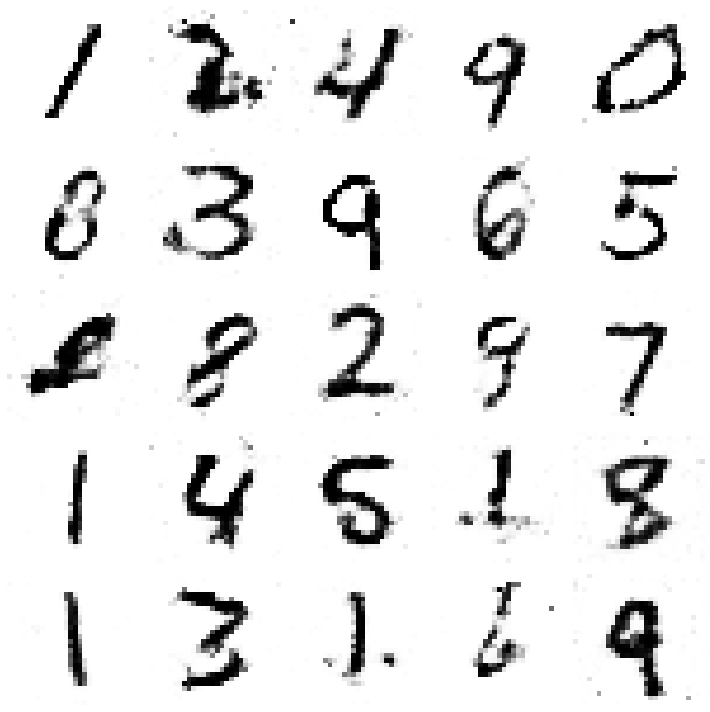

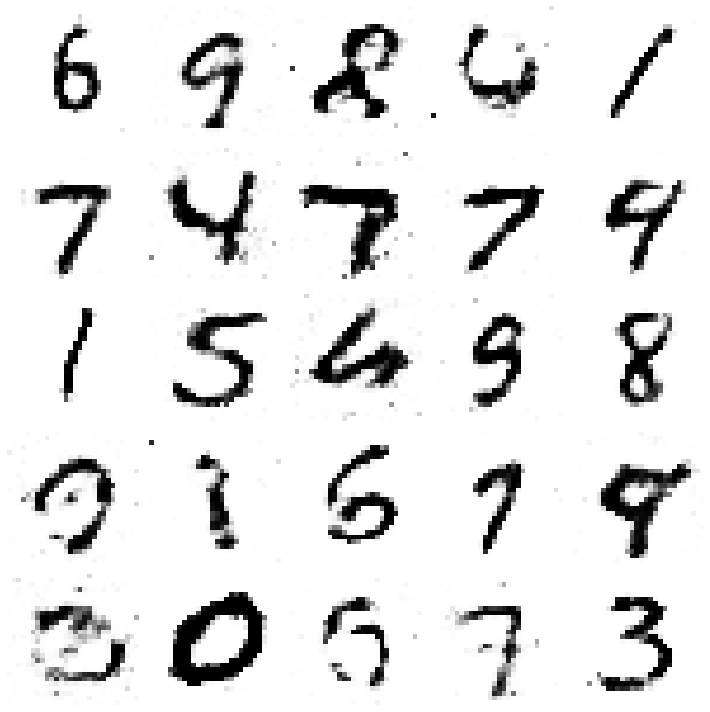

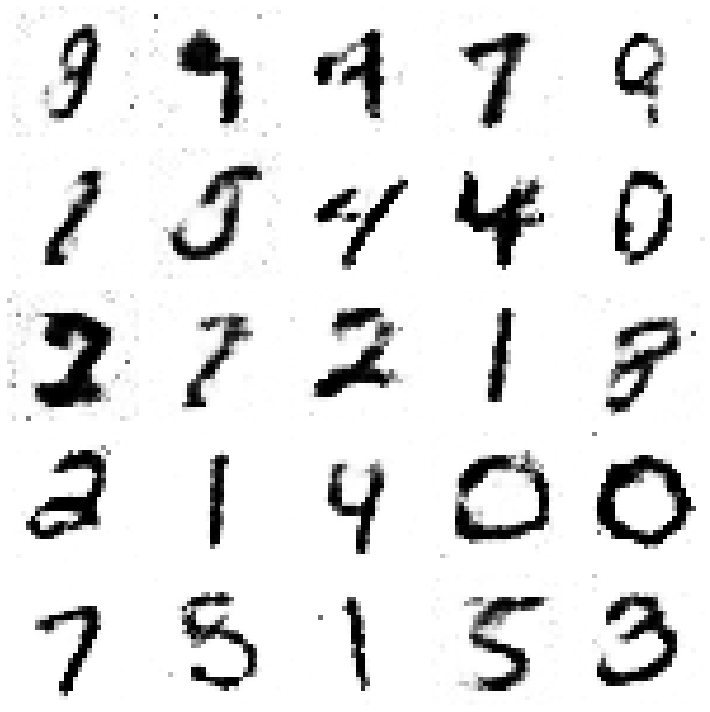

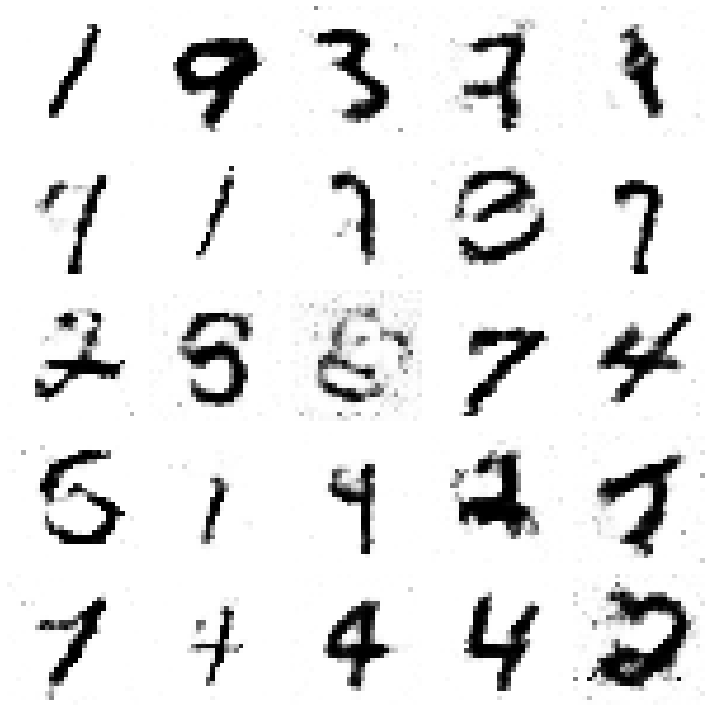

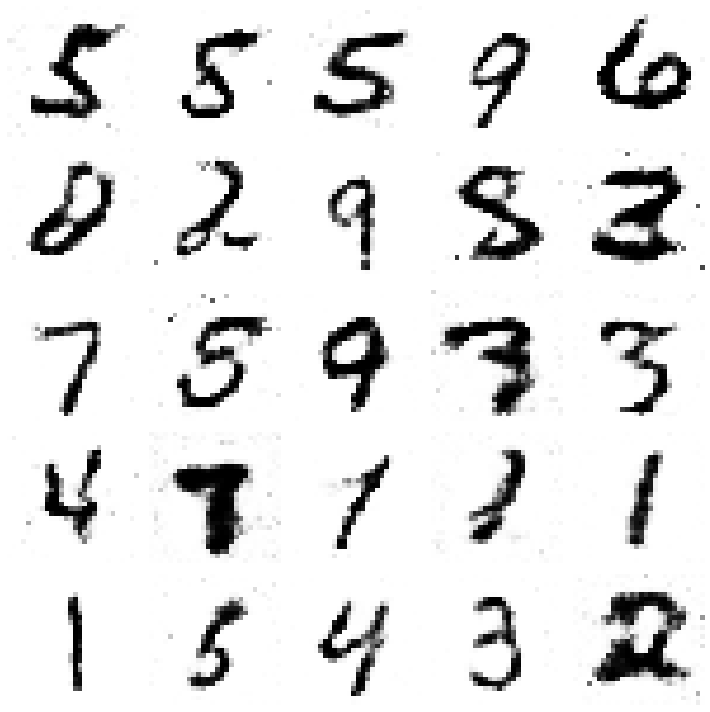

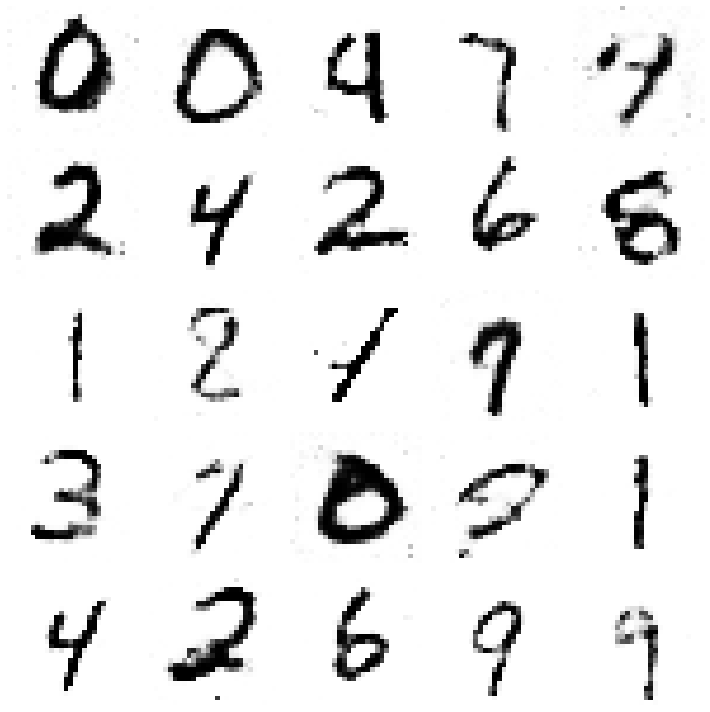

In [9]:
def train_GAN(epochs=1,batch_size=128):
    X_train,y_train = load_data()
    generator = build_generator()
    discriminator = build_discriminator()
    GAN = build_GAN(discriminator,generator)
    
    for i in range(1,epochs+1):
        print("Epoch %d" %i)
        
        for _ in tqdm(range(batch_size)):
            noise = np.random.normal(0,1,(batch_size,100))
            fake_images = generator.predict(noise)
            
            real_images = X_train[np.random.randint(0,X_train.shape[0],batch_size)]
            
            label_fake = np.zeros(batch_size)
            label_real = np.ones(batch_size)
            
            X = np.concatenate([fake_images,real_images])
            y = np.concatenate([label_fake,label_real])
            
            discriminator.trainable=True
            discriminator.train_on_batch(X,y)
            
            discriminator.trainable=False
            GAN.train_on_batch(noise,label_real)
            
        if i==1 or i%10==0:
            draw_images(generator,i)
            
train_GAN(epochs=200,batch_size=128)